In [9]:
import pandas as pd
from matplotlib_venn import venn3
from pylab import * 
%matplotlib inline
matplotlib.rc('font', size=14)

## Load data

In [10]:
hpa = pd.read_csv("./results/hpa_filtered.tsv", sep="\t")
hpa.head()

,hgnc,status,subcellular_location
0,CYP51A1,Validated,Endoplasmic reticulum
1,BAD,Validated,Mitochondria
2,RBM5,Validated,Nucleoplasm
3,FKBP4,Validated,Cytosol
4,FKBP4,Validated,Nucleoplasm


In [11]:
swissprot = pd.read_csv("./results/swissprot_filtered.tsv", sep="\t")
swissprot.head()

,uniprot_id,species,hgnc,subcellular_location,annotation_evidence
0,Q9NRA8,Homo sapiens,EIF4ENIF1,Cytoplasm,ECO:0000269
1,Q9NRA8,Homo sapiens,EIF4ENIF1,Nucleus,ECO:0000269
2,Q9NRA8,Homo sapiens,EIF4ENIF1,Nucleus,ECO:0000269
3,Q9NRA8,Homo sapiens,EIF4ENIF1,Nucleus speckle,ECO:0000269
4,Q676U5,Homo sapiens,ATG16L1,Cytoplasm,ECO:0000269


In [12]:
deeploc = pd.read_csv("./results/deeploc_filtered.tsv", sep="\t")
deeploc.head()

,hgnc,Prediction
0,A2M,Extracellular
1,A3GALT2,Endoplasmic_reticulum
2,A4GALT,Golgi_apparatus
3,A4GNT,Golgi_apparatus
4,AAAS,Nucleus


## Overlap of proteins (predicted vs. annotated)
3-way-venn hpa/swissprot/deeploc on protein names

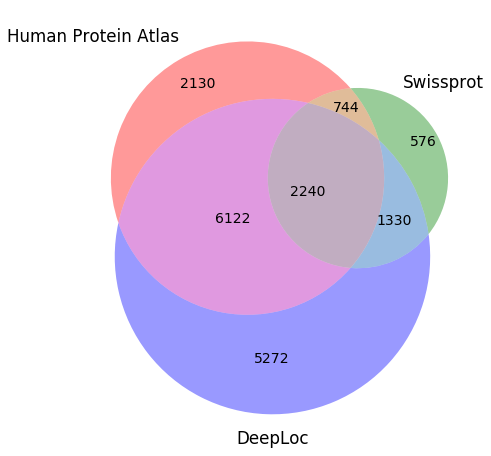

In [13]:
fig, ax = subplots(figsize=(8, 8))
venn3([set(hpa["hgnc"]),set(swissprot["hgnc"]), set(deeploc["hgnc"])],
      set_labels=("Human Protein Atlas", "Swissprot", "DeepLoc"))

## Overlap of locations
3-way venn showing the agreement of Experimental Data with Prediction Data

To this end, we need to map the location identifiers to each other.

The location identifier per database are: 

In [14]:
all_locations = pd.concat([
    hpa.loc[:, ("subcellular_location",)]\
        .assign(source='hpa'),
    swissprot.loc[:, ("subcellular_location",)]\
        .assign(source='swissprot'),
    deeploc.loc[:, ("Prediction",)]\
        .rename(columns={"Prediction": "subcellular_location"})\
        .assign(source="deeploc")
])\
.drop_duplicates()\
.reset_index(drop=True)

In [15]:
all_locations.to_csv("./results/all_locations.tsv", sep="\t", index=False)

In [16]:
with pd.option_context('display.max_rows', None):
    print(all_locations)

                                  subcellular_location     source
0                                Endoplasmic reticulum        hpa
1                                         Mitochondria        hpa
2                                          Nucleoplasm        hpa
3                                              Cytosol        hpa
4                                       Nuclear bodies        hpa
5                                      Golgi apparatus        hpa
6                                      Plasma membrane        hpa
7                                           Centrosome        hpa
8                        Microtubule organizing center        hpa
9                                             Vesicles        hpa
10                                             Nucleus        hpa
11                                            Nucleoli        hpa
12                                         Peroxisomes        hpa
13                                           Endosomes        hpa
14        